<h1>Принятие решений в бизнесе<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-исходных-данных" data-toc-modified-id="Анализ-исходных-данных-1">Анализ исходных данных</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1">Описание проекта</a></span></li><li><span><a href="#Загрузка-исходных-данных" data-toc-modified-id="Загрузка-исходных-данных-1.2">Загрузка исходных данных</a></span></li></ul></li><li><span><a href="#Приоритезация-гипотез" data-toc-modified-id="Приоритезация-гипотез-2">Приоритезация гипотез</a></span></li><li><span><a href="#Анализ-A/B---теста" data-toc-modified-id="Анализ-A/B---теста-3">Анализ A/B - теста</a></span><ul class="toc-item"><li><span><a href="#Загрузка-исходных-данных" data-toc-modified-id="Загрузка-исходных-данных-3.1">Загрузка исходных данных</a></span></li><li><span><a href="#Сбор-кумулятивных-данных" data-toc-modified-id="Сбор-кумулятивных-данных-3.2">Сбор кумулятивных данных</a></span></li></ul></li><li><span><a href="#Изучение-аномалий" data-toc-modified-id="Изучение-аномалий-4">Изучение аномалий</a></span></li><li><span><a href="#Формулирование-и-проверка-гипотез" data-toc-modified-id="Формулирование-и-проверка-гипотез-5">Формулирование и проверка гипотез</a></span></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-6">Итоги исследования</a></span></li><li><span><a href="#Чек-лист-проекта" data-toc-modified-id="Чек-лист-проекта-7">Чек-лист проекта</a></span></li></ul></div>

## Анализ исходных данных

### Описание проекта

Мы делаем аналитику крупного интернет-магазина.\
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.\
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Часть 1. Приоритизация гипотез.**

Необходимо выполнить следующие задачи:

* Применить фреймворк ICE для приоритизации гипотез.
* Применить фреймворк RICE для приоритизации гипотез.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.

**Часть 2. Анализ A/B-теста**

Необходимо выполнить следующие задачи

Проанализируйте A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Загрузка исходных данных

Импортируем все необходимые библиотеки и изучим данные:

In [1]:
# импорт необходимых для работы библиотек

# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#изменим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

import pandas as pd
import numpy as np
import seaborn as sns


sns.set_style("darkgrid")

from scipy import stats as st
from datetime import datetime, timedelta

Загружаем данные о гипотезах

In [2]:
# загружаем датафрейм 
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Описание данных таблицы `hypothesis`:**

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.\
Чем больше значение Efforts, тем дороже проверка гипотезы.

Приведем названия колонок требуемому виду:

In [3]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]
hypothesis = hypothesis.rename(columns={'hypothesis':'title'})
hypothesis

,title,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Видим, что пропущенных значений в данных нет

Ознакомлюсь на всяких случай с общей информации о датафрейме:

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных верные

## Приоритезация гипотез

Приоритезирую гипотезы по параметрам `Reach`, `Impact`, `Confidence`, `Effort`

Применю фреймворк `ICE`:

In [5]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']  
hypothesis[['title','ice']].sort_values('ice',ascending=False)

,title,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [6]:
hypothesis['title'][8]

'Запустить акцию, дающую скидку на товар в день рождения'

Согласно данному методу приоритезации гипотез, гипотеза - `Запустить акцию, дающую скидку на товар в день рождения` наиболее приоритетная

Теперь применим фреймворк `RICE`

In [7]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']  
hypothesis[['title','rice']].sort_values('rice',ascending=False)

,title,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [8]:
hypothesis['title'][7]

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

Согласно данному методу приоритезации гипотез, гипотеза -'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' наиболее приоритетная.

In [9]:
hypothesis.sort_values('rice',ascending=False)

,title,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


**Выводы**

Изменение приоритезации произошло по следующим причинам:

* При расчете фреймворка ICE не учитывается параметр охвата пользователей Reach. У гиппотезы с индексом 8 очень весомые показатели по влиянию Impact и уверенность во влиянии изменения на пользователя Confidence - 8 и 8 соответственно, при относительно низких затратах Efforts - 5. 
* При расчете фреймворка RICE в ход идет охват пользователей, здесь и выходит вперед гипотеза с индексом 7, посольку при тех же затратах на проверку гипотезы и чуть меньших показателях по влиянию и уверенности, охват пользователей - все 10 баллов. Учитывая в расчете охват пользователей, видим, что гипотеза с индексом 8 не попала даже в тройку первых.

Учитывая вышесказанное, наиболее приоритетная для проверки гипотеза увеличения выручки  - `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`

## Анализ A/B - теста

### Загрузка исходных данных

Загрузим исходные данные проведенного A/B-теста для анализа 

Таблица заказов:

In [10]:
# загрузка таблицы с заказами
orders = pd.read_csv('orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Описание данных таблицы `orders`**:

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Приведу названия столбцов к снейк-стайлу

In [11]:
orders.columns = [x.replace('Id','_id') for x in orders.columns ]
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Теперь выглядит читабельнее.

Изучим типы данных в колонках датафрейма:

In [12]:
orders.dtypes

transaction_id     int64
visitor_id         int64
date              object
revenue            int64
group             object
dtype: object

Необходимо провести замену типа данных в столбце `date` на datetime64

In [13]:
orders['date'] = orders['date'].astype('datetime64')
orders.dtypes

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object

Замена типа данных произведена корректно

Посмотрим, корректно ли писались логи и нет ли дубликатов и пропусков в данных:

In [14]:
print(f'''Кол-во дубликатов: {orders.duplicated().sum()}
Кол-во пропусков:
{orders.isna().sum()}''')

Кол-во дубликатов: 0
Кол-во пропусков:
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


Дубликатов нет и пропусков тоже, можно продолжать анализ

Теперь загружу таблицу с логами по посещениям сайта:

In [15]:
# загрузка таблицы с посещениями
visits = pd.read_csv('visitors.csv')
visits

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


**Описание данных таблицы `visitors`**:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста;

Названия столбцов корректны, отражают логику информации.

Проверим типы данных в столбцах

In [16]:
visits.dtypes

date        object
group       object
visitors     int64
dtype: object

Приведу тип данных в колонке date к datetime64

In [17]:
visits['date'] = visits['date'].astype('datetime64')
visits.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

Теперь тип данных корректен

Посмотрим, корректно ли писались логи и нет ли дубликатов и пропусков в данных:

In [18]:
print(f'''Кол-во дубликатов: {visits.duplicated().sum()}
Кол-во пропусков:
{visits.isna().sum()}''')

Кол-во дубликатов: 0
Кол-во пропусков:
date        0
group       0
visitors    0
dtype: int64


Дубликатов нет и пропусков тоже, можно продолжать анализ

Осталось проверить корректно ли просходило сплитование на группы, и нет ли задвоек пользователей в группах:

Пройдемся по таблице заказов:

Создаю выборки пользователей из контрольной группы:

In [19]:
visitor_a = orders[orders['group']=='A']['visitor_id']
visitor_a

2       4069496402
7         78758296
8        295230930
10       879864040
12      3213223594
           ...    
1187     132143192
1188    1022829655
1193     370388673
1194     573423106
1195    1614305549
Name: visitor_id, Length: 557, dtype: int64

Создаю выборки пользователей из эксперементальной группы:

In [20]:
visitor_b = orders[orders['group']=='B']['visitor_id']
visitor_b

0       3312258926
1       3642806036
3       1196621759
4       2322279887
5        935554773
           ...    
1189     393266494
1190    1197745035
1191     608641596
1192    3733762160
1196    2108080724
Name: visitor_id, Length: 640, dtype: int64

Проверяю входимость и записываю `visitor_id` в переменную `users_duplicated`

In [21]:
users_duplicated = visitor_a[visitor_a.isin(visitor_b)]
users_duplicated.nunique()

58

58 задвоенных пользователей, сплит работал не корретно. Удаляю этих пользователей из датафрейма `orders`

In [22]:
orders = orders.query('visitor_id not in @users_duplicated').reset_index(drop=True)
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B


Теперь можно приступать к сбору кумулятивных метрик

### Сбор кумулятивных данных

Создадим массив уникальных пар значений дат и групп теста.
В данном массиве будут содержаться уникальные даты, в которые пользователи группы A или B совершали заказы.

In [23]:
dates_groups = (
    orders[['date','group']]
    .drop_duplicates()
    .reset_index(drop=True)
)
dates_groups

,date,group
0,2019-08-15,B
1,2019-08-15,A
2,2019-08-16,A
3,2019-08-16,B
4,2019-08-01,A
...,...,...
57,2019-08-12,A
58,2019-08-13,B
59,2019-08-13,A
60,2019-08-14,B


Теперь соберем агрегированные кумулятивные данные о заказах:

In [24]:
orders_aggregated = (
    dates_groups
    .apply(
        lambda x: orders[
            np.logical_and(
                orders['date'] <= x['date'],
                orders['group'] == x['group'])]
        .agg(
               {
                 'date':'max',
                 'group':'max',
                 'transaction_id':'nunique',
                 'visitor_id':'nunique',
                 'revenue':'sum',
               }
        ), axis=1)
    .sort_values(by=['date','group'])
)
orders_aggregated.head()                  

,date,group,transaction_id,visitor_id,revenue
4,2019-08-01,A,23,19,142779
5,2019-08-01,B,17,17,59758
12,2019-08-02,A,42,36,234381
11,2019-08-02,B,40,39,221801
17,2019-08-03,A,66,60,346854


Данные по всем датам заказав каждой из групп есть

Теперь проделаем аналогичные операции с визитами

In [25]:
# получаем агрегированные кумулятивные 
# по дням данные о посетителях интернет-магазина 
visits_aggregated = (
    dates_groups
    .apply(
        lambda x: visits[
            np.logical_and(
                visits['date'] <= x['date'],
                visits['group'] == x['group'])]
        .agg(
               {
                 'date':'max',
                 'group':'max',
                 'visitors':'sum',
               }
        ), axis=1)
    .sort_values(by=['date','group'])
)
visits_aggregated.head()

,date,group,visitors
4,2019-08-01,A,719
5,2019-08-01,B,713
12,2019-08-02,A,1338
11,2019-08-02,B,1294
17,2019-08-03,A,1845


Теперь объединим данные по заказам и посетителям

In [26]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = (
    orders_aggregated.merge(
        visits_aggregated,
        left_on=['date','group'],
        right_on=['date','group'],
    )
)

cumulative_data.columns = ['date','group','orders','buyers','revenue','visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Кумулятивные данные подготовлены, теперь можн о анализировать метрики.

Для начала посмотрим как менялась кумулятивная выручка по дням и группам А/B-тестирования:

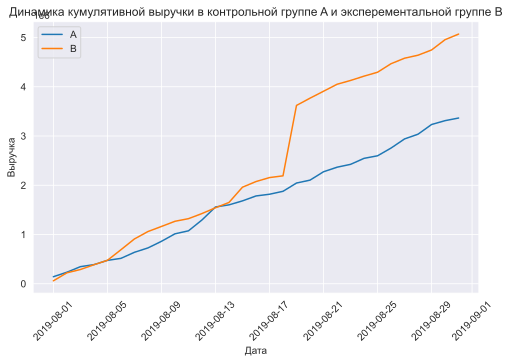

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] =='A'][['date','revenue','orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group'] =='B'][['date','revenue','orders']]

plt.figure(figsize=(8,5))
sns.lineplot(x=cumulative_revenue_a['date'],y=cumulative_revenue_a['revenue'],label='A')
sns.lineplot(x=cumulative_revenue_b['date'],y=cumulative_revenue_b['revenue'],label='B')
plt.legend()
plt.title('Динамика кумулятивной выручки в контрольной группе A и эксперементальной группе B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(fontsize=10,rotation=45)
plt.show()

**Вывод по кумулятивной выручке**:

Выручка почти равномерно увеличивается в течение всего теста.\
Однако график выручки эксперементальной группы в нескольких точках резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

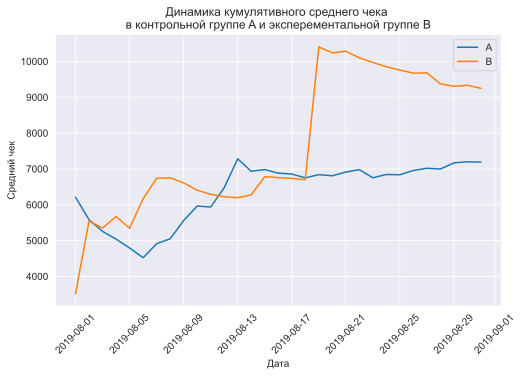

In [28]:
plt.figure(figsize=(8,5))
sns.lineplot(x=cumulative_revenue_a['date'],y=cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'],label='A')
sns.lineplot(x=cumulative_revenue_b['date'],y=cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'],label='B')
plt.legend()
plt.title('''Динамика кумулятивного среднего чека 
в контрольной группе A и эксперементальной группе B''')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(fontsize=10,rotation=45)
plt.show()

**Вывод по среднему чеку:**

* На первой половине графика среднего чека контрольной группы А средний чек бы низким, в данные попали заказы с низкой стоимостью заказов. Затем величина среднего чека почти уравновещивается и выходит на плато.

* На графике эксперементальной группы видим выбросы, что говорит нам, что в данные попали пользователи, сделавшие аномально большие заказы. Тогда понадобится больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [29]:
# собираем данные в одном датафрейме
merged_сumulative_revenue = (
    cumulative_revenue_a.merge(
        cumulative_revenue_b,
        left_on='date',
        right_on='date',
        how='left',
        suffixes=['_a', '_b']
    )
)
merged_сumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


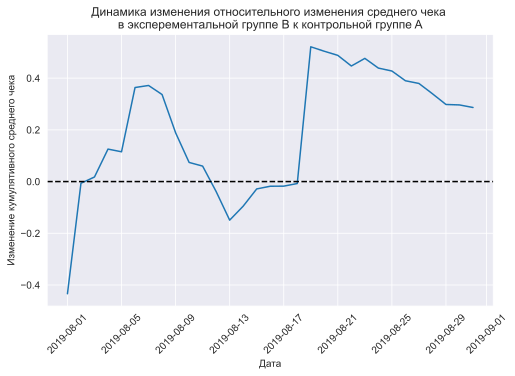

In [30]:
plt.figure(figsize=(8,5))
# cтроим отношение средних чеков
plt.plot(
    merged_сumulative_revenue['date'],
    (merged_сumulative_revenue['revenue_b']/merged_сumulative_revenue['orders_b'])/(merged_сumulative_revenue['revenue_a']/merged_сumulative_revenue['orders_a'])-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('''Динамика изменения относительного изменения среднего чека 
в эксперементальной группе B к контрольной группе A''')
plt.ylabel('Изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.xticks(fontsize=10,rotation=45)
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.

Аналогично проанализируем график кумулятивной конверсии.

In [31]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


Конверсия посчитана верно

In [32]:
# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_a.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390
4,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,A,99,92,474413,3318,0.029837


Отделение контрольной группы - есть

In [33]:
# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']
cumulative_data_b.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,59758,713,0.023843
3,2019-08-02,B,40,39,221801,1294,0.030912
5,2019-08-03,B,54,53,288850,1803,0.029950
7,2019-08-04,B,68,66,385740,2573,0.026428
9,2019-08-05,B,89,87,475648,3280,0.027134


Отделение эксперементальной группы - есть

In [34]:
datetime(2019,8,2)

datetime.datetime(2019, 8, 2, 0, 0)

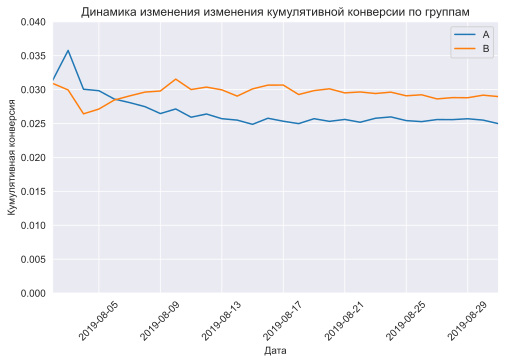

In [35]:
plt.figure(figsize=(8,5))
# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.axis([datetime(2019,8,2), datetime(2019,8,31), 0, 0.04])
plt.title('Динамика изменения изменения кумулятивной конверсии по группам')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.xticks(fontsize=10,rotation=45)
plt.show()

Конверсия группы A изначально была выше, но затем конверсия эксперементальной группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

Видим, что конверсия эксперементальной группы выше, чем контрольной почти на 0,5 %, хороший знак.

Построим график относительного различия кумулятивных конверсий:

In [36]:
merged_cumulative_conversions = (
    cumulative_data_a[['date','conversion']].merge(
        cumulative_data_b[['date','conversion']],
        left_on='date',
        right_on='date',
        how='left',
        suffixes=['_a', '_b']
    )
)
merged_cumulative_conversions.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


In [37]:
cumulative_data_a.dtypes

date          datetime64[ns]
group                 object
orders                 int64
buyers                 int64
revenue                int64
visitors               int64
conversion           float64
dtype: object

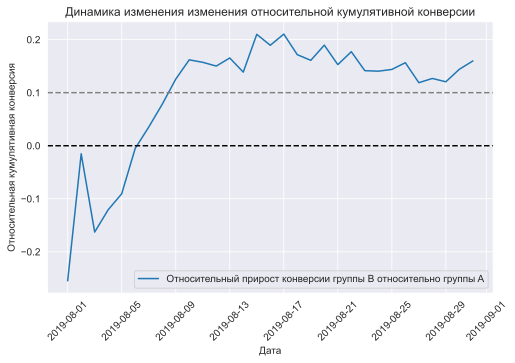

In [38]:
plt.figure(figsize=(8,5))
plt.plot(
    merged_cumulative_conversions['date'],
    merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1,
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title('Динамика изменения изменения относительной кумулятивной конверсии')
plt.ylabel('Относительная кумулятивная конверсия')
plt.xlabel('Дата')
plt.xticks(fontsize=10,rotation=45)
plt.show()

В начале теста группа B проигрывала группе A, затем эксперементальная группа B вырвалась вперёд. И превысилила конверсию группы А почти на 15%.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 
Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

## Изучение аномалий

Изучим гистограмму распределения стоимостей заказов:

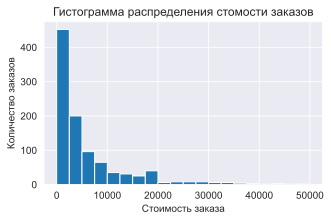

In [39]:
plt.hist(orders['revenue'],bins=20,range=(0,50000))
plt.title('Гистограмма распределения стомости заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказа');

Видим выбросы в данных по стоимости заказов. Есть заказы дороже 20 000. 

Построим диаграмму рассяния для большей наглядности

Сразу выкину при отображении диграммы слишком яркие аномалии.

In [40]:
bad_revenue = 200000

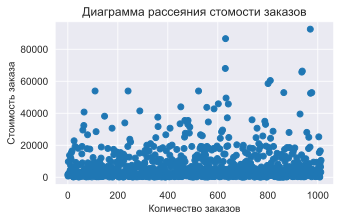

In [41]:
x_values = pd.Series(range(0,len(orders[orders['revenue'] < bad_revenue]['revenue'])))
plt.scatter(x_values, orders[orders['revenue'] < bad_revenue]['revenue'])
plt.title('Диаграмма рассеяния стомости заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа');

Всё, как предполагали: есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 и 40 000. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

Определим 90, 95 и 99 перцентили среднего чека в выборке:

In [42]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, «обычный» пользователь совершает не больше двух заказов за короткий срок.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [43]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Как видим, пользователи в основном совершали 1-2 заказа, в очень редких случаях 3.

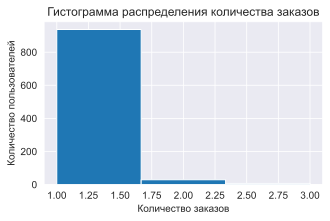

In [44]:
plt.hist(orders_by_users['orders'],bins=3)
plt.title('Гистограмма распределения количества заказов')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов');

Большинство покупателей заказывали только один раз. Присутствует небольшая доля пользователей с 2-3 заказами.

Построим точечную диаграмму числа заказов на одного пользователя:

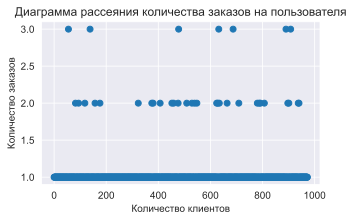

In [45]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Диаграмма рассеяния количества заказов на пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Количество клиентов');

Выводы подтверждаются: много пользователей с 1 заказами и небольшая доля пользователей с 2-3 заказами Их точная доля не ясна — непонятно, считать их аномалиями или нет.\
Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [46]:
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ. Всего лишь 1% оформлял более 2.\
Разумно выбрать 1 заказ на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## Формулирование и проверка гипотез

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:

**Нулевая:** различий в среднем количестве заказов между группами нет.\
**Альтернативная:** различия в среднем между группами есть.

In [47]:
visitors_a_daily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head() 

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Получили итоговый датафрейм

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные `orders_by_users_a` и `orders_by_users_b` со столбцами `['visitor_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [48]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders'] 

Объявим переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [49]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительное среднее увеличение количества заказов: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))
 

p-value: 0.011
Относительное среднее увеличение количества заказов: 0.160


**Вывод**

По сырым данным различия в среднем числе заказов групп А и В есть. p-value = 0.011 меньше, чем стат значимость alpha = 0.05\
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. \
Относительный выигрышь группы B равен 16 %.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.

**Нулевая гипотеза:** различий в среднем чеке между группами нет.

**Альтернативная гипотеза:** различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [50]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное увеличение среднего чека: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
Относительное увеличение среднего чека: 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.\
Однако, средний чек группы B значительно выше среднего чека группы A почти на 30%. В данном случае такой результат получается вследствие влияния выбросов.

Вспомним, что найденные ранее 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя.\
Примем за аномальных пользователей тех, кто совершил , более 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.\
Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 30 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users.

In [51]:
unnormal_count_orders = 2
unnormal_revenue = 30000

In [52]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > unnormal_count_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > unnormal_count_orders]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > unnormal_revenue]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users.head(5)

937    148427295
792    204675465
33     249864742
586    358944393
557    382846391
Name: visitor_id, dtype: int64

In [53]:
abnormal_users.shape[0] 

49

Всего 49 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [54]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [55]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительное среднее увеличение количества заказов: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

p-value: 0.010
Относительное среднее увеличение количества заказов: 0.187


Результаты по среднему количеству заказов практически не изменились. Значение p-value уменьшилось относительной предудущей проверки статистической значимости на 1,1%, а вот среднее увеличение количества заказов увеличилось примерно на 2,7%. Произошло ли что-нибудь с результатами по среднему чеку?

In [56]:
print(
    'p-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное увеличение среднего чека: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.741
Относительное увеличение среднего чека: -0.027


P-value уменьшился, а также разница между сегментами стала отрицательной -2,7%. Это говорит о том, что средний чек в эксперементальной группе стал даже ниже, чем в контрольной.

## Итоги исследования

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым данным нет статистически значимого различия по среднему чеку между группами. Как до удаления аномалий, так и после удаления аномалий статистически значимое различие отсутствует.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: конверсия зафиксировалась около среднего значения.
* График различия среднего чека колеблется, в данных есть аномалии, что сильно влияло на кумулятивную функцию. В хвосте график имеет ниспадающий характер. После удаления аномалий такой график будет показовать изменение относительного среднего чека бликое к нулю.

**Исходя из фактов выше необходимо:**
    
Остановить тест и признать его успешным. Конверсия в эксперементальной группе В выше, чем в контрольной A.

## Чек-лист проекта

Необходимо выполнить следующие задачи

Проанализируйте A/B-тест:
1. [x] Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. [x] Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. [x] Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. [x] Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. [x] Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. [x] Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. [x] Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. [x] Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. [x] Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. [x] Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. [x] Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. [x] Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. [x] Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. [x] Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.